<a href="https://colab.research.google.com/github/elisagl/Curso_phyton/blob/main/Redes_neuronales_artificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install mealpy==2.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import numpy as np
from mealpy.swarm_based.GWO import GWO_WOA

In [32]:
# Leer la base de datos
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [33]:
df["PRECIO"] = boston_dataset.target
print (df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRECIO  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

In [34]:
# Seleccionar variables de entrada y variables de salida
X_datos = df.drop("PRECIO", axis=1)
Y_datos = df["PRECIO"]
print(X_datos)
print(Y_datos)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [35]:
#Dividir la información entre los datos de entrenamiento y los datos de prueba
X_entreno, X_prueba, Y_entreno, Y_prueba = train_test_split(X_datos, Y_datos, test_size=0.3, random_state=30)

In [36]:
#Pre-procesamiento de datos para escalar valores
escalador = StandardScaler()
escalador.fit(X_entreno)
X_entreno_escalado = escalador.transform(X_entreno)
X_prueba_escalado = escalador.transform(X_prueba)

print(X_entreno_escalado)
print(X_prueba_escalado)

[[-0.36674596 -0.50097557  1.63393715 ...  1.26531104  0.22331214
   0.6458033 ]
 [ 0.28684993 -0.50097557  1.07239917 ...  0.80759583  0.42844561
   0.23131397]
 [ 2.15989737 -0.50097557  1.07239917 ...  0.80759583  0.42844561
   1.05459519]
 ...
 [ 0.56387997 -0.50097557  1.07239917 ...  0.80759583 -3.26923637
   1.66849519]
 [ 0.32479955 -0.50097557  1.07239917 ...  0.80759583 -0.4176062
   0.47487987]
 [-0.39151689 -0.50097557  0.4530776  ... -1.11480807  0.42844561
  -0.53926585]]
[[-0.31210314 -0.50097557 -0.40330486 ...  1.173768    0.38037948
   0.20852418]
 [ 1.87599002 -0.50097557  1.07239917 ...  0.80759583  0.36850044
   1.38789589]
 [-0.37820609 -0.50097557 -0.34107638 ...  1.12799648  0.40171776
   0.15297406]
 ...
 [-0.38821913  0.32987639 -0.57813726 ...  0.07525148  0.40710733
  -0.66033662]
 [-0.3964331   2.82243227 -0.87594501 ...  0.34988061  0.42844561
  -1.28705589]
 [-0.3903681   0.01830691 -0.44330888 ... -1.48098024  0.35805128
   0.47630423]]


In [40]:
from keras.engine import sequential 
# Definir el modelo de la Red Neuronal
modelo =Sequential()
modelo.add(Dense(80, input_dim=13))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(10, activation="relu"))

#Definir la capa de salida 
modelo.add(Dense(1, activation="relu"))
modelo.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae"])
modelo.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                1120      
                                                                 
 dense_10 (Dense)            (None, 10)                810       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
9/9 [==============================] - 1s 23ms/step - loss: 545.1724 - mae: 21.4670 - val_loss: 498.7083 - val_mae: 19.9703
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 512.2145 - mae: 20.7305 - val_loss: 467.3494 - val_mae: 19.2109
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 476.9609 - mae: 19.8958 - val_loss: 432.9621 - val_mae: 18.3358
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 438.0740 - mae: 18.9279 - val_loss: 395.5386 - val_mae: 17.3575
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 393.6674 - mae: 17.8358 - val_loss: 355.5716 - val_mae: 16.2227
Epoch 6/1000
9/9 [==============================] - 0s 14ms/step - loss: 348.5525 - mae: 16.6534 - val_loss: 313.5489 - val_mae: 14.9828
Epoch 7/1000
9/9 [==============================] - 0s 14ms/step - loss: 300.6561 - mae: 15.2905 - val_loss: 270.5924 - val_mae: 13.6798
Epoch 8/1000
9/9 [===========================

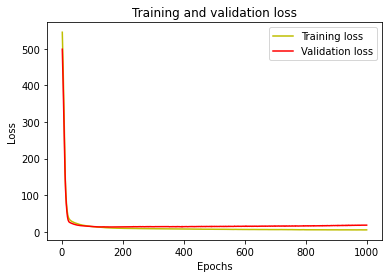

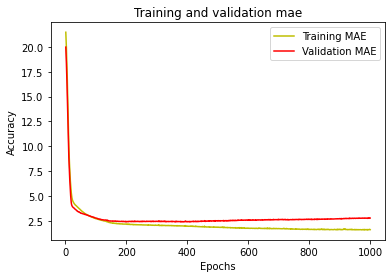

In [38]:
history = modelo.fit(X_entreno_escalado, Y_entreno, validation_split=0.2, epochs=1000)
import matplotlib.pyplot as plt
#Código para graficar
loss = history.history ['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', Label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
#Predecir valores
predicciones = modelo.predict(X_prueba_escalado[:5])
print("La predicción de valores es: ", predicciones)
print("Los valores reales son: ", Y_prueba[:5])

1/1 [==============================] - 0s 55ms/step
La predicción de valores es:  [[15.242684 ]
 [ 4.8188252]
 [19.051598 ]
 [29.819008 ]
 [17.22558  ]]
Los valores reales son:  21     19.6
440    10.5
103    19.3
178    29.9
22     15.2
Name: PRECIO, dtype: float64
